In [ ]:
def arrowed_spines(fig, ax, remove_ticks=False):
    """
    좌표축 화살표를 그리기 위한 함수
    https://stackoverflow.com/questions/33737736/matplotlib-axis-arrow-tip
    """
    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    if remove_ticks == True: 
        # removing the axis ticks
        plt.xticks([]) # labels 
        plt.yticks([])
        ax.xaxis.set_ticks_position('none') # tick markers
        ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./50.*(ymax-ymin) 
    hl = 1./25.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.4 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, #overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=yhw, head_length=yhl, #overhang = ohg, 
             length_includes_head= True, clip_on = False)

In [5]:
# 자연 상수

import numpy as np

x = np.array([2, 10, 100, 1000, 10000, 100000])
y = (1+1 / x) ** x

print(y)

[2.25       2.59374246 2.70481383 2.71692393 2.71814593 2.71826824]


In [6]:
# 로그 함수

import numpy as np

def log(x, base=np.e):
    return np.log(x) / np.log(base)

print(log(4, 2))
print(log(100, 10))

2.0
2.0


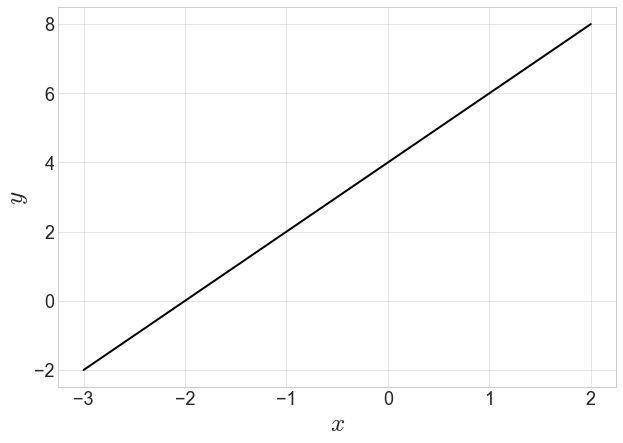

In [3]:
# 그래프 그리기

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('bmh') # 그래프에서 사용할 테마 설정
mpl.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(10, 7)) # (10, 7) 크기의 그림 생성
ax = fig.add_subplot(1, 1, 1) # 그림에 좌표축 생성
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
plt.xlabel('$x$', fontsize=25) # LATEX 문법
plt.ylabel('$y$', fontsize=25)

x = np.linspace(-3, 2, 10)
y = 2 * x + 4

ax.plot(x, y, 'k')

arrowed_spines(fig, ax) # 깃허브 참고

plt.show()